In [2]:
import numpy as np # computation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt



In [3]:
# data is too large, take first train_row rows
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    X_train = train.values[0:train_row,1:] #take all rows and thier col 1:
    y_train = train.values[0:train_row,0] #lable
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values
    Pred_test = Pred_test[:train_row]
    return X_train, y_train, Pred_test

train_row = 42000
data_dir = "/Users/Galen/Desktop/AI/1all/"
Origin_X_train, Origin_y_train, Origin_X_test = load_data(data_dir, train_row)

(42000, 785)


In [26]:
print(Origin_X_train.shape, Origin_y_train.shape,Origin_X_test.shape)
print(Origin_X_train)

(5000, 784) (5000,) (5000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


import matplotlib
import matplotlib.pyplot as plt

row = 3
print(Origin_y_train[3])
plt.imshow(Origin_X_train[row].reshape(28,28))
plt.show()

2


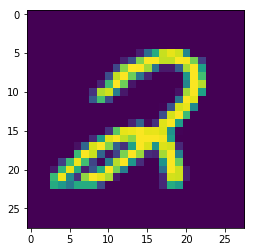

In [31]:
import matplotlib 
import matplotlib.pyplot as plt

row = 1533
print(Origin_y_train[row]) 
plt.imshow(Origin_X_train[row].reshape(28,28)) 
plt.show()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


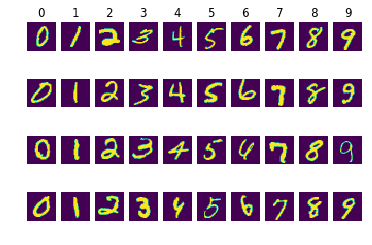

In [35]:
classes =["0","1","2","3","4","5","6","7","8","9"]
rows=4

print(classes)

for y, cls in enumerate(classes):
    idxs = np.nonzero([i==y for i in Origin_y_train]) #index of non -zero values
    idxs = np.random.choice(idxs[0], rows) # randomly select "rows" value
    for i , idx in enumerate (idxs):
        plt_idx = i * len(classes) +y +1
        plt.subplot(rows, len(classes),plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28,28)))
        plt.axis("off")
        if i ==0:
            plt.title(cls)
plt.show()    
    
    
    
    
    
    
    
    
    
    

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train,Origin_y_train,test_size =0.2, random_state =0)
print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [41]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [42]:
k_range =range(1,8)
scores = []
for k in k_range:
    print('k= ', k, 'begin')
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    #magical step
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali, y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))
    print(confusion_matrix(y_vali, y_pred))
    print('Completion time: ', end-start, 'seconds.')
    
    

k=  1 begin
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  0

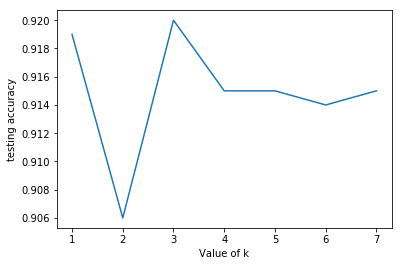

In [44]:
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('testing accuracy')
plt.show()

In [46]:
k =3
knn =KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train,Origin_y_train)
y_pred = knn.predict(Origin_X_test[:300])


8


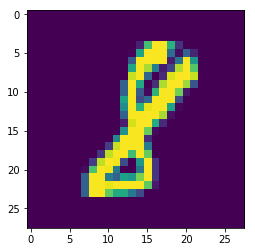

In [48]:
print(y_pred[123])
plt.imshow(Origin_X_test[123].reshape(28,28))
plt.show()